# 逻辑回归（Logistic Regression）


## 概述
假设现在有一些数据点，用一条直线对这些点进行拟合（该线称为最佳拟合直线），这个拟合过程就称为回归。  
利用逻辑回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。

## 算法流程
> 收集数据：采用任意方法收集数据
> 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳  
> 分析数据：采用任意方法对数据进行分析  
> 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数  
> 测试算法：一旦训练步骤完成，分类将会很快  
> 使用算法：首先，需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，就可以在输出的类别上做一些其他分析工作

## 基于逻辑回归和Sigmoid函数的分类
逻辑回归
> 优点：计算代价不高，易于理解和实现  
> 缺点：容易欠拟合，分类精度可能不高  
> 适用数据类型：数值型和标称型数据  

我们想要的函数应该是，能接受所有的输入然后预测出类别。例如，对于而分类问题，该函数应该返回0或1。具有这种性质的函数称为**海维塞德阶跃函数(Heaviside step function)**，或直接称为**单位阶跃函数**。海维塞德阶跃函数的问题在于：该函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理。
Sigmoid函数是一个S型曲线，其函数形式为：
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
当输入z等于0时，Sigmoid函数值为0.5。随着z的增大，对应的函数值趋近于1；随着z的减小，对应的函数值趋近于0。
https://zh.wikipedia.org/wiki/S%E5%87%BD%E6%95%B0#/media/File:Sigmoid_function_01.png

## 基于最优化方法的最佳回归系数确定

### 梯度上升法
梯度上升法基于的思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。

In [11]:
import numpy as np

def loadDataSet():
    '''
    加载数据集
    '''
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    '''
    S函数
    '''
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    '''
    梯度上升算法
    param dataMatIn: 特征值
    param classLabels: 标签
    '''
    # 特征值矩阵
    dataMatix = np.mat(dataMatIn)
    # 标签矩阵；行向量转置为列向量
    labelMat = np.mat(classLabels).transpose()
    # 获取特征值矩阵大小
    m, n = np.shape(dataMatix)
    # 移动步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 回归系数
    weights = np.ones((n, 1))
    
    for k in range(maxCycles):
        h = sigmoid(dataMatix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatix.transpose() * error
        
    return weights

In [24]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 分析数据：画出决策边界

In [45]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

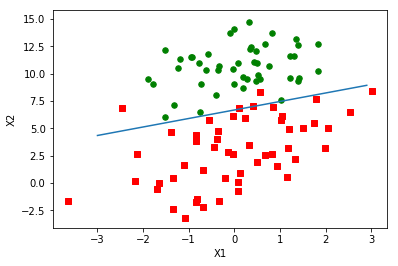

In [46]:
plotBestFit(weights.getA())